In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Binarizer, OneHotEncoder, OrdinalEncoder
from scipy.stats import pearsonr, spearmanr, chi2_contingency, pointbiserialr, f_oneway
from sklearn.impute import SimpleImputer
import pandas as pd
from scipy.stats import pearsonr, spearmanr, chi2_contingency, pointbiserialr, f_oneway

In [2]:
df = pd.read_csv('/Users/sele/Desktop/AUS FALL 24/repositories/Data-Mining-Project/Preprocessing/Feature Cleaners/Numeric_Cleaned_Sol.csv')

In [3]:
#dataframe that shows selected columns only


cata = df[['EX_level_demand','Applicants_Num', 'Payment_Situation', 'Spent','Client_Country','Connects','Feedback_Num','Payment_type','Job_Cost','Hourly_Rate']]
cata.head()

,EX_level_demand,Applicants_Num,Payment_Situation,Spent,Client_Country,Connects,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate
0,Expert,2.5,Payment unverified,0.0,United States,12.0,0.0,Fixed-price,2500.0,NaN
1,Intermediate,2.5,Payment verified,100.0,Canada,8.0,1.0,Fixed-price,200.0,NaN
2,Intermediate,2.5,Payment verified,200.0,United States,12.0,1.0,Hourly,NaN,40.0
3,Expert,2.5,Payment verified,100000.0,Canada,12.0,26.0,Hourly,NaN,67.5
4,Expert,2.5,Payment verified,100000.0,United States,12.0,11.0,Hourly,NaN,125.0


In [4]:
#cata.loc[cata['Job_Cost'].notnull()].shape
cata.loc[cata['Hourly_Rate'].notnull()].shape

(26502, 10)

Will run two approaches:

1. Build a unified model that has all features 
2. Split the data between fixed price and hourly and build two different models 

After encoding and normalizing will prepare separate datasets for each approach 

In [5]:
catagorical = cata.select_dtypes(include=['object'])
catagorical.head()

,EX_level_demand,Applicants_Num,Payment_Situation,Client_Country,Payment_type
0,Expert,2.5,Payment unverified,United States,Fixed-price
1,Intermediate,2.5,Payment verified,Canada,Fixed-price
2,Intermediate,2.5,Payment verified,United States,Hourly
3,Expert,2.5,Payment verified,Canada,Hourly
4,Expert,2.5,Payment verified,United States,Hourly


# Nominal and Ordinal Encoding

One-hot encoding for:
Client_Country
Payment_type
Payment_Situation

Ordinal encoding for:
EX_level_demand


Change Applicants_Num to float and roud to nearest largerst intiger

In [6]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

nominal_vars = ['Client_Country', 'Payment_type', 'Payment_Situation']  
ordinal_vars = ['EX_level_demand']
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_nominal = onehot_encoder.fit_transform(df[nominal_vars])
encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=onehot_encoder.get_feature_names_out(nominal_vars))

In [7]:
encoded_nominal_df.head()

,Client_Country_Albania,Client_Country_Algeria,Client_Country_American Samoa,Client_Country_Andorra,Client_Country_Angola,Client_Country_Anguilla,Client_Country_Antigua and Barbuda,Client_Country_Argentina,Client_Country_Armenia,Client_Country_Australia,...,Client_Country_United States Virgin Islands,Client_Country_Uruguay,Client_Country_Uzbekistan,Client_Country_Venezuela,Client_Country_Vietnam,Client_Country_Yemen,Client_Country_Zambia,Client_Country_Zimbabwe,Payment_type_Hourly,Payment_Situation_Payment verified
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [8]:
ordinal_encoder = OrdinalEncoder()
encoded_ordinal = ordinal_encoder.fit_transform(df[ordinal_vars])
encoded_ordinal_df = pd.DataFrame(encoded_ordinal, columns=ordinal_vars)
encoded_ordinal_df.value_counts()


EX_level_demand
2.0                26383
1.0                15795
0.0                 4340
Name: count, dtype: int64

# Applicants_Num

In [9]:
df.loc[df['Applicants_Num'] =='50+', 'Applicants_Num'] = 50
df['Applicants_Num'].value_counts()

Applicants_Num
35      12695
7.5      8910
2.5      8103
12.5     7002
17.5     5248
50       4560
Name: count, dtype: int64

In [10]:
applicants_num = df['Applicants_Num'].astype(float)
applicants_num = np.ceil(applicants_num)
applicants_num.sample(5)

4714      3.0
44499    13.0
39892     3.0
42057    35.0
4441     35.0
Name: Applicants_Num, dtype: float64

# Remaining numerical features

Investigating the Numerical Features

In [11]:
numerical_cols = ['Spent','Feedback_Num']

In [12]:
numericals = df.select_dtypes(include=['float64', 'int64'])
numericals.head()



,Spent,Connects,Feedback_Num,Job_Cost,Hourly_Rate
0,0.0,12.0,0.0,2500.0,NaN
1,100.0,8.0,1.0,200.0,NaN
2,200.0,12.0,1.0,NaN,40.0
3,100000.0,12.0,26.0,NaN,67.5
4,100000.0,12.0,11.0,NaN,125.0


In [13]:
def visualize():
    numerical_cols = numericals.columns
    num_plots = len(numerical_cols)
    num_rows = int(num_plots**0.5)
    num_cols = int(np.ceil(num_plots / num_rows))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.kdeplot(df[col], ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()

Log transformation for Spent and feedback_num

In [14]:
numericals.loc[numericals['Spent'] ==0].shape

(19945, 5)

In [15]:
numericals['Spent'] = np.log(numericals['Spent'] + 1)

In [16]:
feedback = np.log(numericals['Feedback_Num'] +1)

In [17]:
numericals['Feedback_Num'] = feedback

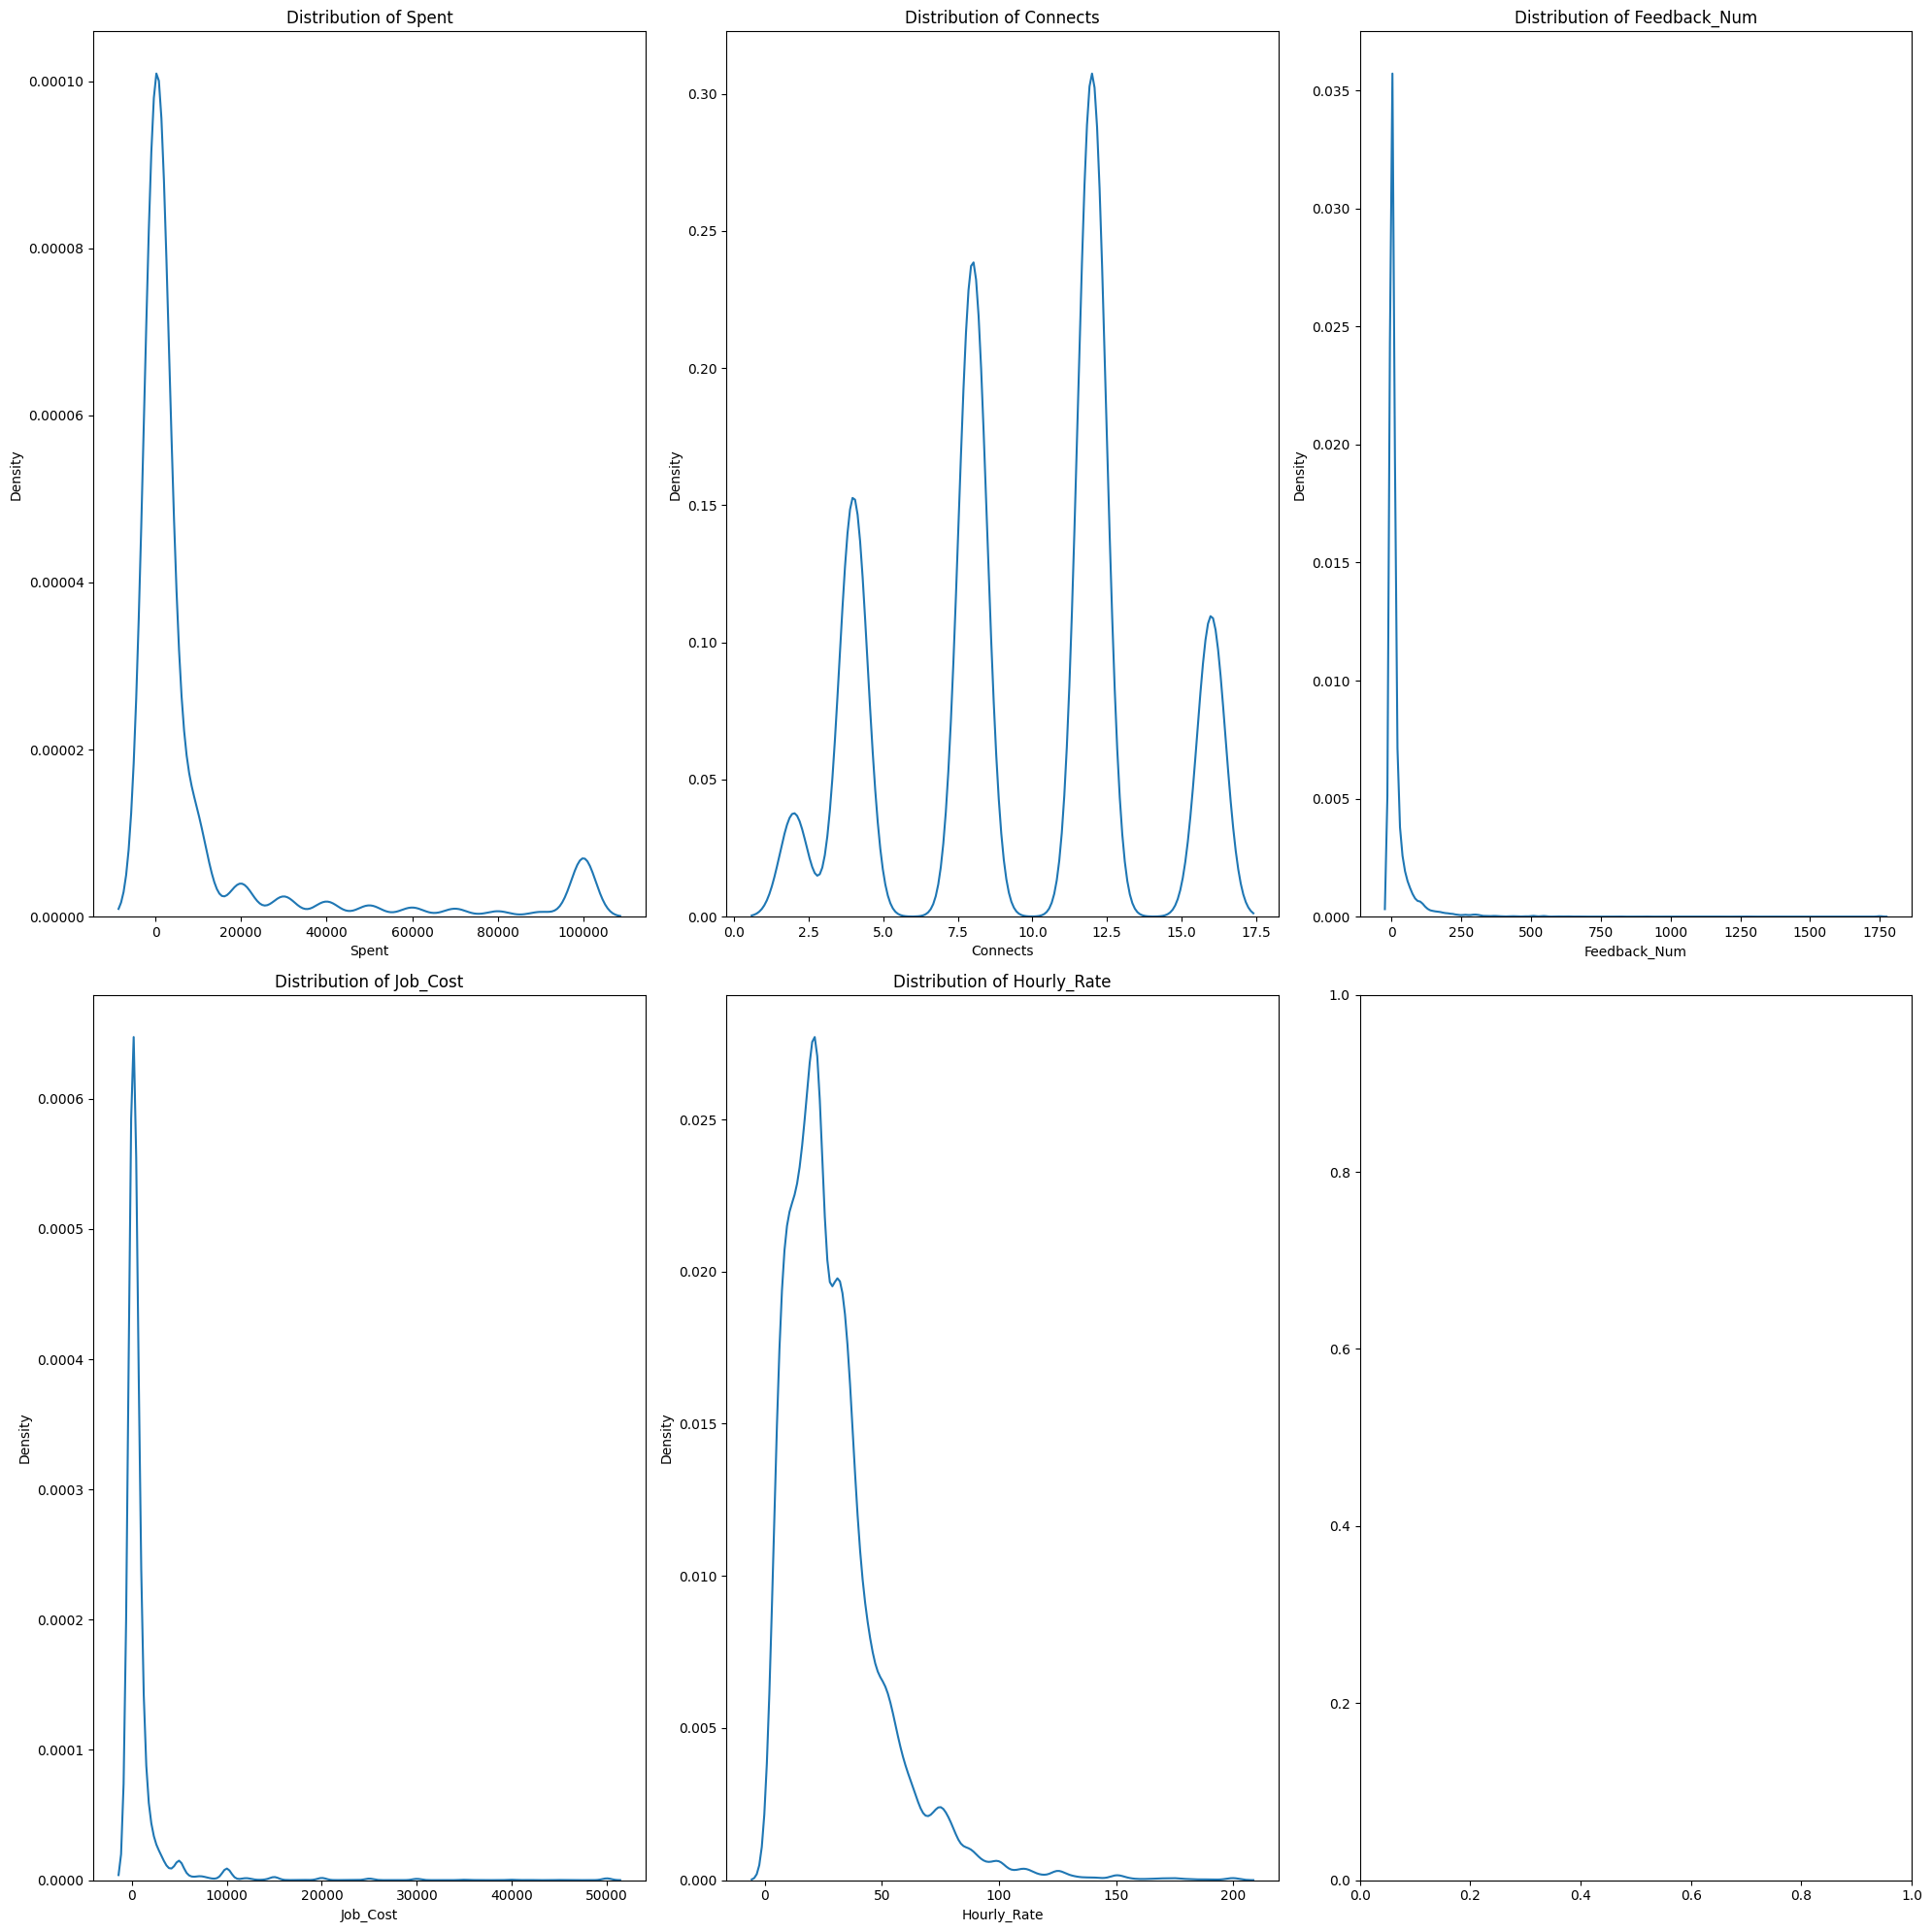

In [18]:
visualize()

In [19]:
numericals.head()

,Spent,Connects,Feedback_Num,Job_Cost,Hourly_Rate
0,0.000000,12.0,0.000000,2500.0,NaN
1,4.615121,8.0,0.693147,200.0,NaN
2,5.303305,12.0,0.693147,NaN,40.0
3,11.512935,12.0,3.295837,NaN,67.5
4,11.512935,12.0,2.484907,NaN,125.0


In [20]:
numericals = pd.concat([numericals, applicants_num], axis=1)

In [22]:
numericals.head()

,Spent,Connects,Feedback_Num,Job_Cost,Hourly_Rate,Applicants_Num
0,0.000000,12.0,0.000000,2500.0,NaN,3.0
1,4.615121,8.0,0.693147,200.0,NaN,3.0
2,5.303305,12.0,0.693147,NaN,40.0,3.0
3,11.512935,12.0,3.295837,NaN,67.5,3.0
4,11.512935,12.0,2.484907,NaN,125.0,3.0


In [29]:
numeric_columns = numericals.columns
numeric_columns = numeric_columns.tolist()

# Putting it all together

Dropping the updated columns

In [30]:
df.drop(nominal_vars + ordinal_vars + numeric_columns , axis=1, inplace=True)

In [32]:
encoded_df = pd.concat([df, encoded_nominal_df, encoded_ordinal_df, numericals], axis=1)

In [34]:
encoded_df.shape

(46518, 198)

We now have 198 features mainly due to the large number of Client Country.

In [35]:
encoded_df.to_csv('encoded_data.csv', index=False)

In [36]:
encoded_df.head()

,Job Title,Search_Keyword,Description,Category_1,highlight,Category_2,Category_3,Category_4,Category_5,Category_6,...,Client_Country_Zimbabwe,Payment_type_Hourly,Payment_Situation_Payment verified,EX_level_demand,Spent,Connects,Feedback_Num,Job_Cost,Hourly_Rate,Applicants_Num
0,Power bi specialist freelance,Data_science,Already data pooled and designed. Need to refi...,Data Analysis,data,Data Visualization,Microsoft Power BI,SQL,NaN,NaN,...,0.0,0.0,0.0,1.0,0.000000,12.0,0.000000,2500.0,NaN,3.0
1,Case Study (on-demand delivery startup),Data_science,"Hi,\n\nWould you be able to help me do a case-...",Google Data Studio,Google Data Studio,SQL,Tableau,Microsoft Excel,Microsoft PowerPoint,Python,...,0.0,0.0,1.0,2.0,4.615121,8.0,0.693147,200.0,NaN,3.0
2,"File Maker Pro Reports, Charts, Query and Ongo...",Data_science,NITIAL PROJECT\n\nSet up Monthly Report mimick...,Report Writing,NaN,Custom Graphics,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,2.0,5.303305,12.0,0.693147,NaN,40.0,3.0
3,Implementation of EleutherAI/gpt-neox-20b,Data_science,"As a first step, you will implement the instal...",Machine Learning Model,NaN,Machine Learning,Python,NaN,NaN,NaN,...,0.0,1.0,1.0,1.0,11.512935,12.0,3.295837,NaN,67.5,3.0
4,Computer vision / machine learning: synthetic ...,Data_science,Our company is working on a government proposa...,Generative Adversarial Network,data,Machine Learning,Computer Vision,Neural Network,NaN,NaN,...,0.0,1.0,1.0,1.0,11.512935,12.0,2.484907,NaN,125.0,3.0
